# Download data

In [1]:
import yfinance as yf

In [2]:
df = yf.download('MSFT')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...
2024-08-09,404.029999,408.049988,402.260010,406.019989,405.289490,19276700
2024-08-12,407.059998,408.760010,404.239990,406.809998,406.078064,16762900
2024-08-13,409.589996,414.950012,409.570007,414.010010,413.265137,19414300


<AxesSubplot:xlabel='Date'>

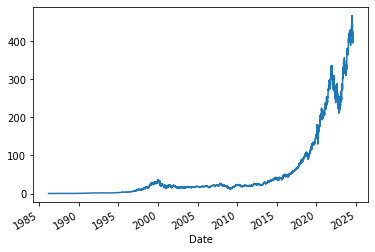

In [3]:
price = df['Adj Close']
price.plot()


# Moving Average

<AxesSubplot:xlabel='Date'>

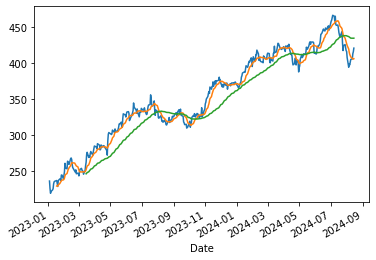

In [4]:
price[price.index>'2023-01-01'].plot()
price[price.index>'2023-01-01'].rolling(window = 10).mean().plot()
price[price.index>'2023-01-01'].rolling(window = 50).mean().plot()

# Detrend

<AxesSubplot:xlabel='Date'>

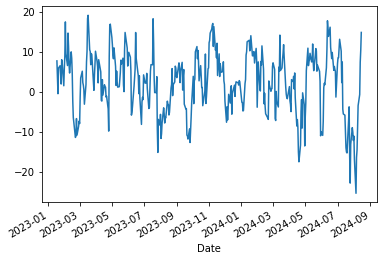

In [5]:
price = price[price.index>'2023-01-01']

trend = price.rolling(window = 10).mean()

resd = price - trend

resd.plot()

# fiting to see tend in price

[-1.40970241e-10  8.03384546e-08 -5.26924553e-07 -5.99424348e-03
  1.45284802e+00  2.17627458e+02]


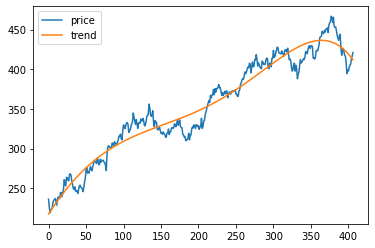

In [6]:
from matplotlib import pyplot as plt
import numpy as np

x = range(len(price))
fit_result = np.polyfit(x, price, deg = 5 )
print(fit_result)
fit_value = np.polyval(fit_result,x)

plt.plot(x, price, label = 'price')
plt.plot(x, fit_value , label = 'trend')
plt.legend()
plt.show()

# Return

In [7]:
price.shift()

Date
2023-01-03           NaN
2023-01-04    236.183533
2023-01-05    225.852097
2023-01-06    219.158371
2023-01-09    221.741211
                 ...    
2024-08-09    401.965485
2024-08-12    405.289490
2024-08-13    406.078064
2024-08-14    413.265137
2024-08-15    416.109985
Name: Adj Close, Length: 407, dtype: float64

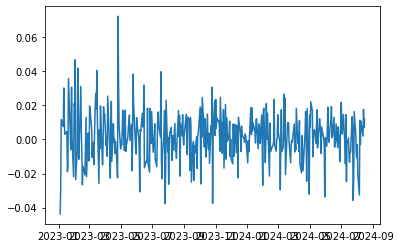

In [8]:
R = (price - price.shift())/price.shift()
plt.plot(R)

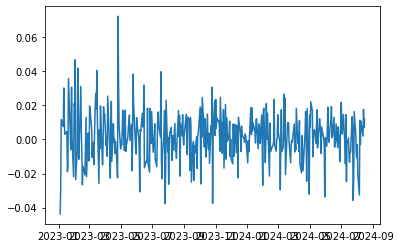

In [9]:
R = price.pct_change()
plt.plot(R)

In [10]:
R.describe()

count    406.000000
mean       0.001532
std        0.014666
min       -0.043743
25%       -0.007066
50%        0.001556
75%        0.010550
max        0.072435
Name: Adj Close, dtype: float64

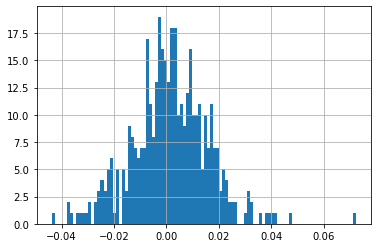

In [11]:
R.hist(bins = 100);

# log return

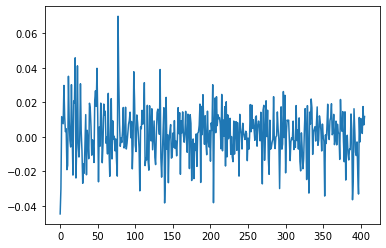

In [12]:
log_R = np.log(price.values[1:]) - np.log(price.values[:-1])
plt.plot(log_R)

In [13]:
from statsmodels.tsa.stattools import acf

acf(log_R)

array([ 1.        , -0.00247184, -0.1439765 ,  0.02765483,  0.03248881,
        0.03508021, -0.06652292,  0.00487764,  0.02954047,  0.07999876,
        0.01141026, -0.11394971,  0.00692098,  0.06204446, -0.02158011,
       -0.06149203, -0.02024498, -0.04421492, -0.03047218, -0.0846737 ,
        0.02315541,  0.08359732, -0.0077805 , -0.06997102, -0.01996349,
       -0.00912712, -0.06068247])

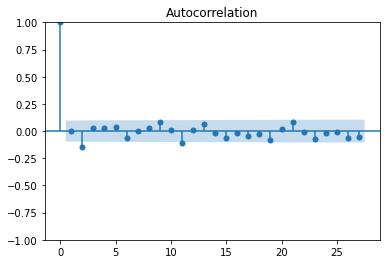

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_R)
plt.show()

# ARMA

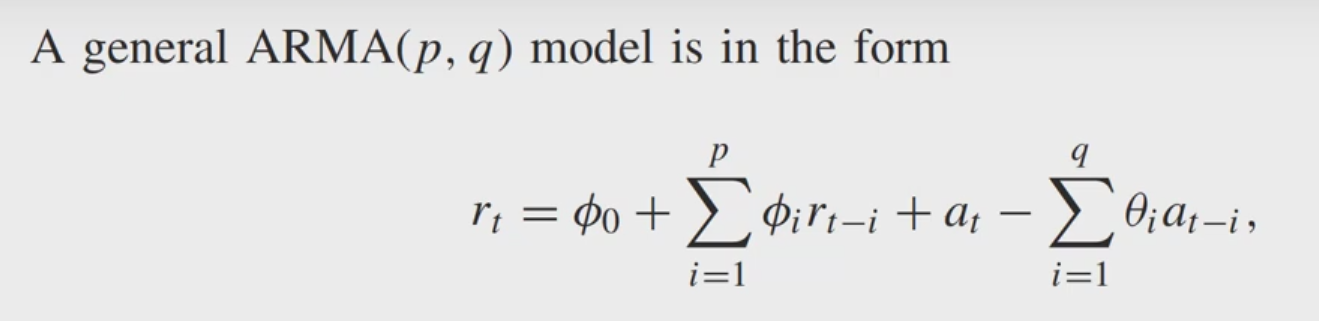

https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_generate_sample.html

# Generate time series

In [15]:
from statsmodels.tsa.arima_process import arma_generate_sample

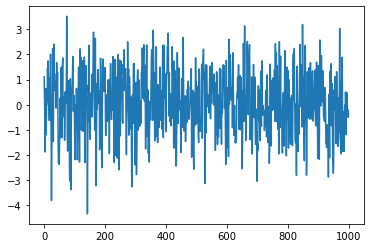

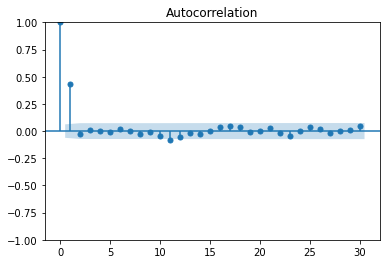

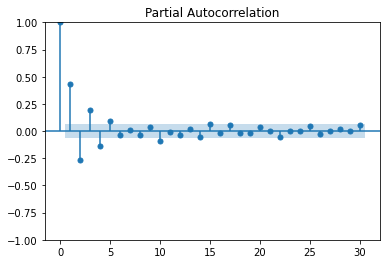

In [16]:
# moving average
from statsmodels.graphics.tsaplots import plot_pacf

r_sample = arma_generate_sample(ar = [1], ma = [1,.7], nsample=1000)
plt.plot(r_sample)
plt.show()

plot_acf(r_sample)
plt.show()

plot_pacf(r_sample)
plt.show()


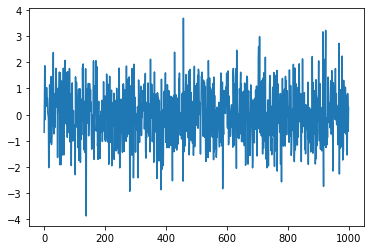

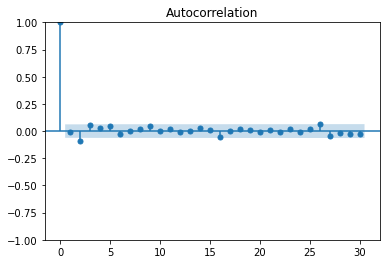

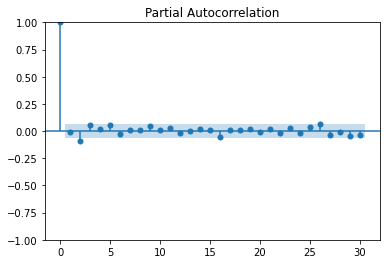

In [17]:
# Whine noise
r_sample = arma_generate_sample(ar = [1], ma = [1], nsample=1000)
plt.plot(r_sample)
plt.show()

plot_acf(r_sample)
plt.show()

plot_pacf(r_sample)
plt.show()


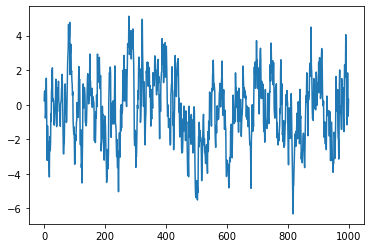

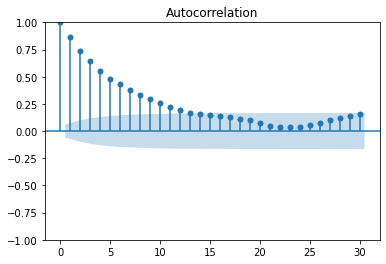

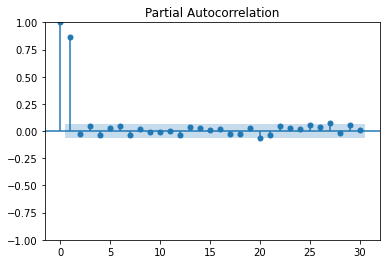

In [18]:
# auto regressive
from statsmodels.graphics.tsaplots import plot_pacf

r_sample = arma_generate_sample(ar = [1, -.9], ma = [1], nsample=1000)
plt.plot(r_sample)
plt.show()

plot_acf(r_sample)
plt.show()

plot_pacf(r_sample)
plt.show()


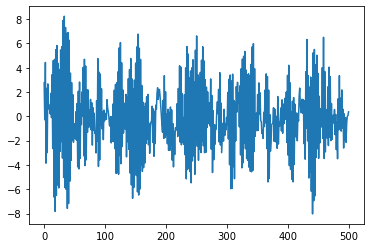

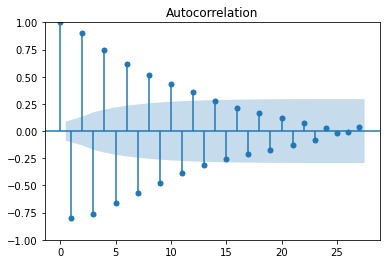

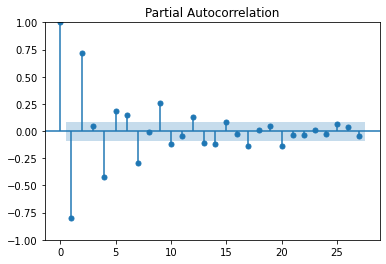

In [19]:
# ARMA
from statsmodels.graphics.tsaplots import plot_pacf

r_sample = arma_generate_sample(ar = [1, .3, -.6], ma = [1,.2,.7, -.4], nsample=500)
plt.plot(r_sample)
plt.show()

plot_acf(r_sample)
plt.show()

plot_pacf(r_sample)
plt.show()

# Fitting

https://www.statsmodels.org/devel/generated/statsmodels.tsa.arima.model.ARIMA.fit.html

In [20]:
from statsmodels.tsa.arima.model import ARIMA

mod = ARIMA(r_sample, order=(2, 0, 3))
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 3)   Log Likelihood                -717.175
Date:                Fri, 16 Aug 2024   AIC                           1448.349
Time:                        00:22:05   BIC                           1477.852
Sample:                             0   HQIC                          1459.926
                                - 500                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1398      0.102     -1.375      0.169      -0.339       0.060
ar.L1         -0.2855      0.117     -2.444      0.015      -0.515      -0.057
ar.L2          0.5986      0.102      5.879      0.0

In [21]:
from statsmodels.tsa.arima.model import ARIMA

for p in range(1, 10):
    for q in range(1, 10):
        try:
            mod = ARIMA(r_sample, order=(p, 0, q))
            res = mod.fit()
            print(p, q, res.aic)
        except Exception as e:
            print(f'Error for (p, q) = ({p}, {q}): {e}')


1 1 1889.037897895461
1 2 1487.7553812524825
1 3 1464.5152504168973
1 4 1449.3319117955507


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


1 5 1450.077951419777
1 6 1450.4409969278595
1 7 1450.571894239055
1 8 1452.505897839468
1 9 1454.4559711865186
2 1 1698.800789537642
2 2 1455.1777080573909
2 3 1448.3492777872032
2 4 1448.541632055114
2 5 1450.2710896059134
2 6 1451.427551624515


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 7 1450.9436633807084


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 8 1450.3781068228618


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 9 1450.7295325872653
3 1 1668.5539658948996
3 2 1446.11222282987


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 3 1448.1064109045494


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 4 1450.3300942343221


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 5 1452.0616145368804


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 6 1447.0705522278508


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 7 1454.5075748954


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 8 1451.7880611716464


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3 9 1452.3660755682804
4 1 1597.7173972223404
4 2 1448.1056832603167


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 3 1445.175823018892


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 4 1451.4931009736438
4 5 1453.6998051526148


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 6 1451.7789883356047


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 7 1450.6533816782337


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 8 1449.879186461058


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


4 9 1454.2485481281217
5 1 1588.3977962073013
5 2 1450.053393573636


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 3 1449.652913537957


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 4 1449.7237995791347


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 5 1444.3134319469245


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 6 1444.7569245580703


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\16462\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


5 7 1455.0316577444216


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 8 1451.0638882246726


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


5 9 1451.3967115815576
6 1 1567.4136137740975
6 2 1452.0238745290449


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 3 1452.8298886186562


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 4 1454.9930796527674


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 5 1441.8224124195021


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 6 1443.85322990642


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 7 1458.29321617002


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 8 1451.2990489556144


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


6 9 1446.9726391985732
7 1 1540.466392704403
7 2 1452.4949482580569


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 3 1454.119546575691


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 4 1456.0255332811118


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 5 1442.9942244517706


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 6 1455.3559386897173


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 7 1448.1150260596492


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 8 1452.5251682046637


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


7 9 1448.378179159638
8 1 1532.3706727301471
8 2 1454.1777807313256


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 3 1455.6709230924039


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 4 1454.4412672462822


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 5 1449.4170303720957


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 6 1461.5093596412758


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 7 1446.0722210472095


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 8 1446.0565601038543


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


8 9 1454.9473669359381
9 1 1506.8334140031243
9 2 1456.11364846677
9 3 1458.1601403932787


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 4 1455.5904073343063


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 5 1449.4716096876427


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 6 1458.2873694295904


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 7 1450.2156267535597


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


9 8 1447.7920415091266
9 9 1451.038106228641


C:\Users\16462\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# nonlinear correlation

In [22]:
df = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


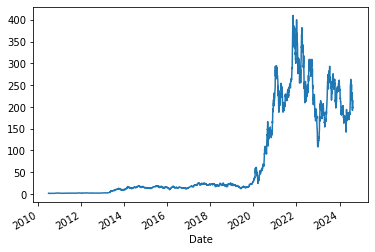

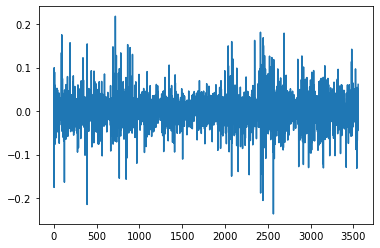

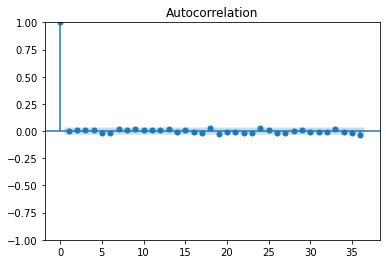

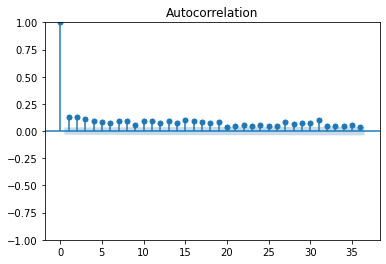

In [23]:
price = df['Adj Close']
price.plot()
plt.show()

log_R = np.log(price.values[1:]) - np.log(price.values[:-1])
plt.plot(log_R)
plt.show()

plot_acf(log_R)
plt.show()

plot_acf(abs(log_R))
plt.show()

# ARCH and GARCH models

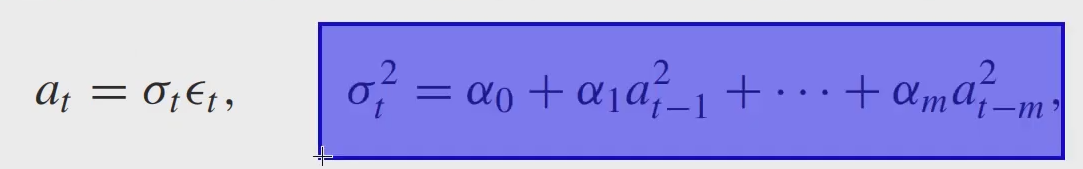

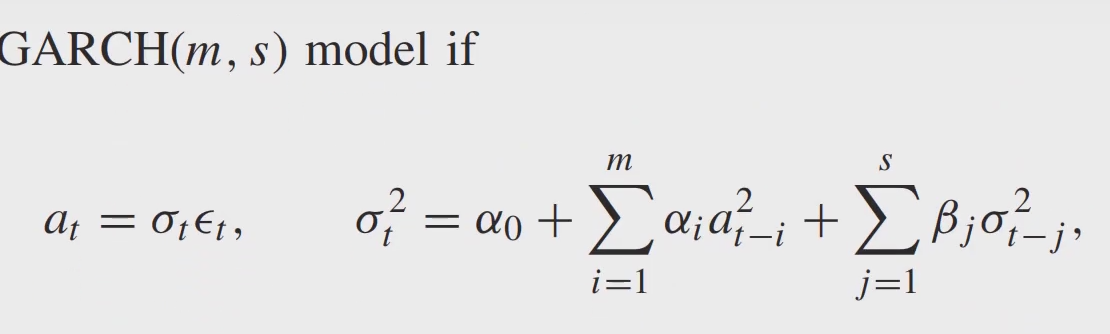

[*********************100%%**********************]  1 of 1 completed


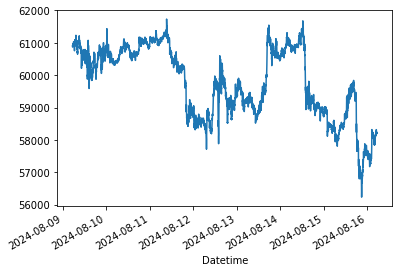

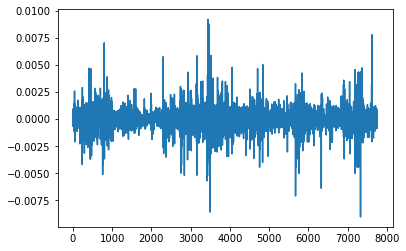

In [24]:
df = yf.download('BTC-USD', interval = '1m')

price = df['Close']
price.plot()
plt.show()

log_R = np.log(price.values[1:]) - np.log(price.values[:-1])
plt.plot(log_R)
plt.show()

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

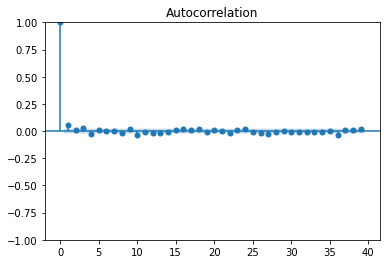

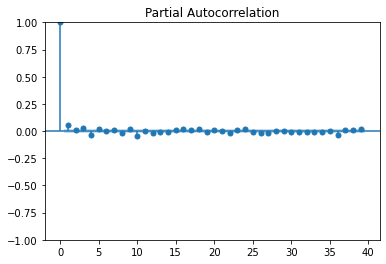

In [25]:
plot_acf(log_R)
plt.show()

plot_pacf(log_R)
plt.show()

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(log_R, order = (2,0,5))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7757
Model:               SARIMAX(2, 0, 5)   Log Likelihood               43478.409
Date:                Fri, 16 Aug 2024   AIC                         -86940.817
Time:                        00:25:07   BIC                         -86885.166
Sample:                             0   HQIC                        -86921.739
                               - 7757                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1639      0.003    -51.214      0.000      -0.170      -0.158
ar.L2          0.3410      0.004     93.228      0.000       0.334       0.348
ma.L1          0.2255      0.003     69.513      0.000       0.219       0.232
ma.L2         -0.3206      0.004    -88.518      0.000      -0.328      -0.313
ma.L3          0.0131      0.007      1.756      0.079      -0.002       0.028
ma.L4         -0.0306      0.007     -4.105      0.000      -0.045      -0.016
ma.L5          0.0001      0.008      0.014      0.989      -0.015       0.015
sigma2      7.921e-07   4.91e-09    161.464      0.000    7.82e-07    8.02e-07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             48977.31
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.34   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.16e+17. Standard errors may be unstable.
"""

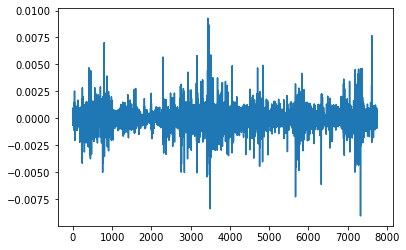

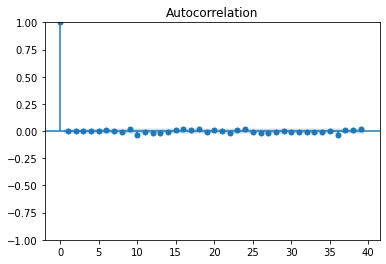

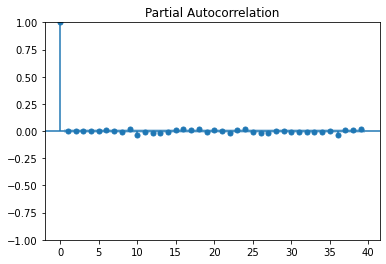

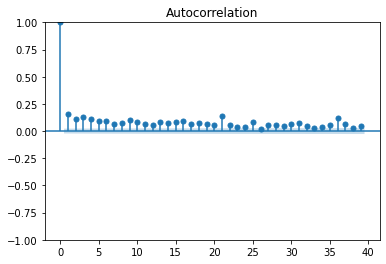

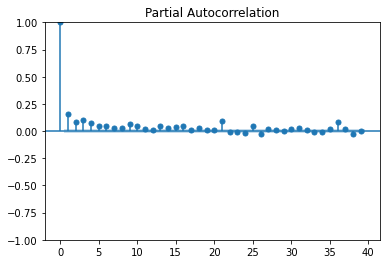

In [27]:
a = res.resid
plt.plot(a)
plt.show()

# linear correlation
plot_acf(a)
plt.show()

plot_pacf(a)
plt.show()

# nonlinear correlation
plot_acf(a**2)
plt.show()

plot_pacf(a**2)
plt.show()

https://pypi.org/project/arch/

In [28]:
!pip install arch


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from arch import arch_model

model = arch_model(a*100000,p = 8, q =8  )
res = model.fit()
res.summary()

Iteration:      1,   Func. Count:     20,   Neg. LLF: 67976.79003401953
Iteration:      2,   Func. Count:     40,   Neg. LLF: 51630.426680385004
Iteration:      3,   Func. Count:     61,   Neg. LLF: 44753.604126730395
Iteration:      4,   Func. Count:     81,   Neg. LLF: 45424.40537658361
Iteration:      5,   Func. Count:    101,   Neg. LLF: 44582.85140370218
Iteration:      6,   Func. Count:    121,   Neg. LLF: 44519.76038836066
Iteration:      7,   Func. Count:    141,   Neg. LLF: 44451.92325401367
Iteration:      8,   Func. Count:    161,   Neg. LLF: 44529.02103081858
Iteration:      9,   Func. Count:    181,   Neg. LLF: 44404.31744383107
Iteration:     10,   Func. Count:    200,   Neg. LLF: 44842.82986620861
Iteration:     11,   Func. Count:    220,   Neg. LLF: 44449.31975178013
Iteration:     12,   Func. Count:    240,   Neg. LLF: 44444.54551045737
Iteration:     13,   Func. Count:    260,   Neg. LLF: 44396.34031313914
Iteration:     14,   Func. Count:    280,   Neg. LLF: 44401.21

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -44383.7
Distribution:                  Normal   AIC:                           88803.4
Method:            Maximum Likelihood   BIC:                           88928.6
                                        No. Observations:                 7757
Date:                Fri, Aug 16 2024   Df Residuals:                     7756
Time:                        00:25:17   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0907      8.987  1.009e-02      0.992 [-17.523, 17.704]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega        315.1216   2134.416      0.148      0.883 [-3.868e+03,4.499e+03]
alpha[1]       0.1646      0.871      0.189      0.850      [ -1.542,  1.871]
alpha[2]       0.1211      0.784      0.155      0.877      [ -1.415,  1.657]
alpha[3]       0.0173      1.100  1.576e-02      0.987      [ -2.139,  2.174]
alpha[4]       0.0380  7.447e-02      0.510      0.610      [ -0.108,  0.184]
alpha[5]       0.0239      4.000  5.966e-03      0.995      [ -7.816,  7.864]
alpha[6]       0.0596      2.087  2.858e-02      0.977      [ -4.030,  4.150]
alpha[7]   2.2835e-08      1.465  1.559e-08      1.000      [ -2.872,  2.872]
alpha[8]   4.9456e-08      2.619  1.888e-08      1.000      [ -5.133,  5.133]
beta[1]    1.4073e-09     14.463  9.731e-11      1.000      [-28.346, 28.346]
beta[2]    2.2766e-08     16.946  1.343e-09      1.000      [-33.214, 33.214]
beta[3]    4.9248e-08     12.105  4.068e-09      1.000      [-23.726, 23.726]
beta[4]    5.2915e-08     12.737  4.154e-09      1.000      [-24.964, 24.964]
beta[5]        0.1284     17.336  7.407e-03      0.994      [-33.850, 34.107]
beta[6]    2.5757e-09      4.727  5.449e-10      1.000      [ -9.265,  9.265]
beta[7]        0.4471     16.089  2.779e-02      0.978      [-31.087, 31.981]
beta[8]    2.5310e-07     12.839  1.971e-08      1.000      [-25.164, 25.164]
=============================================================================

Covariance estimator: robust
"""

# Multivariant Time series

In [30]:
import yfinance as yf

# Download data for Bitcoin (BTC-USD), Ethereum (ETH-USD), Binance Coin (BNB-USD), and Gold (GC=F)
df = yf.download(['BTC-USD', 'ETH-USD', 'BNB-USD', 'GC=F'], interval='5m', start='2024-08-14')

# Display the data
df


[*********************100%%**********************]  4 of 4 completed


Price                       Adj Close                                          \
Ticker                        BNB-USD       BTC-USD      ETH-USD         GC=F   
Datetime                                                                        
2024-08-14 00:00:00+00:00  524.219910  60518.781250  2700.570557          NaN   
2024-08-14 00:05:00+00:00  523.790833  60518.542969  2698.495117          NaN   
2024-08-14 00:10:00+00:00  524.500244  60624.324219  2704.775879          NaN   
2024-08-14 00:15:00+00:00  524.654114  60630.257812  2704.357422          NaN   
2024-08-14 00:20:00+00:00  524.430908  60568.183594  2698.063965          NaN   
...                               ...           ...          ...          ...   
2024-08-16 05:00:00+00:00  519.138367  58303.433594  2598.255859  2490.399902   
2024-08-16 05:05:00+00:00  518.789307  58253.785156  2595.126953  2490.300049   
2024-08-16 05:10:00+00:00  518.173950  58207.375000  2593.506348  2490.500000   
2024-08-16 05:15:00+00:00  518.706360  58222.519531  2595.732422  2490.199951   
2024-08-16 05:20:00+00:00  518.748352  58299.027344  2598.273438          NaN   

Price                           Close                                          \
Ticker                        BNB-USD       BTC-USD      ETH-USD         GC=F   
Datetime                                                                        
2024-08-14 00:00:00+00:00  524.219910  60518.781250  2700.570557          NaN   
2024-08-14 00:05:00+00:00  523.790833  60518.542969  2698.495117          NaN   
2024-08-14 00:10:00+00:00  524.500244  60624.324219  2704.775879          NaN   
2024-08-14 00:15:00+00:00  524.654114  60630.257812  2704.357422          NaN   
2024-08-14 00:20:00+00:00  524.430908  60568.183594  2698.063965          NaN   
...                               ...           ...          ...          ...   
2024-08-16 05:00:00+00:00  519.138367  58303.433594  2598.255859  2490.399902   
2024-08-16 05:05:00+00:00  518.789307  58253.785156  2595.126953  2490.300049   
2024-08-16 05:10:00+00:00  518.173950  58207.375000  2593.506348  2490.500000   
2024-08-16 05:15:00+00:00  518.706360  58222.519531  2595.732422  2490.199951   
2024-08-16 05:20:00+00:00  518.748352  58299.027344  2598.273438          NaN   

Price                            High                ...          Low  \
Ticker                        BNB-USD       BTC-USD  ...      ETH-USD   
Datetime                                             ...                
2024-08-14 00:00:00+00:00  524.330322  60603.265625  ...  2700.570557   
2024-08-14 00:05:00+00:00  524.188110  60518.542969  ...  2696.355225   
2024-08-14 00:10:00+00:00  524.678406  60634.644531  ...  2702.014160   
2024-08-14 00:15:00+00:00  524.730286  60648.570312  ...  2702.784668   
2024-08-14 00:20:00+00:00  524.514709  60653.457031  ...  2698.063965   
...                               ...           ...  ...          ...   
2024-08-16 05:00:00+00:00  519.150391  58317.140625  ...  2596.520996   
2024-08-16 05:05:00+00:00  519.011353  58276.367188  ...  2595.126953   
2024-08-16 05:10:00+00:00  518.562195  58231.417969  ...  2593.506348   
2024-08-16 05:15:00+00:00  518.706360  58222.519531  ...  2593.310059   
2024-08-16 05:20:00+00:00  518.748352  58299.027344  ...  2596.364258   

Price                                         Open                             \
Ticker                            GC=F     BNB-USD       BTC-USD      ETH-USD   
Datetime                                                                        
2024-08-14 00:00:00+00:00          NaN  524.133972  60603.265625  2703.207031   
2024-08-14 00:05:00+00:00          NaN  524.188110  60487.171875  2698.893799   
2024-08-14 00:10:00+00:00          NaN  523.824646  60601.300781  2702.014160   
2024-08-14 00:15:00+00:00          NaN  524.574707  60648.570312  2705.531006   
2024-08-14 00:20:00+00:00          NaN  524.467529  60606.628906  2703.549561   
...                                ...         ...         

In [31]:
price = df['Close']
price = price.fillna(method = 'ffill')

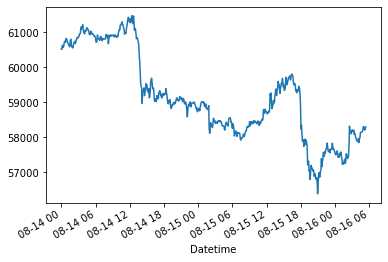

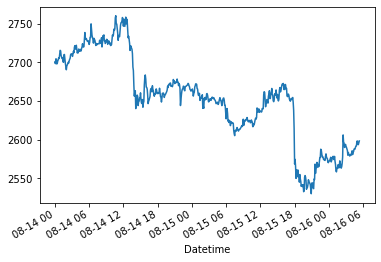

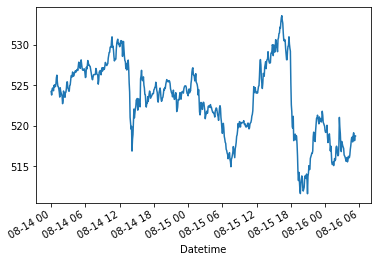

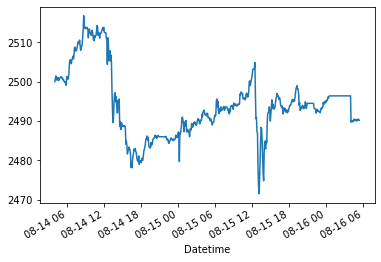

In [32]:
price['BTC-USD'].plot()
plt.show()
price['ETH-USD'].plot()
plt.show()
price['BNB-USD'].plot()
plt.show()
price['GC=F'].plot()
plt.show()

In [33]:
r = np.log(price).diff().dropna()
r

Ticker,BNB-USD,BTC-USD,ETH-USD,GC=F
Datetime,,,,
2024-08-14 04:05:00+00:00,0.000397,-0.000894,-0.000452,0.000360
2024-08-14 04:10:00+00:00,0.000267,0.001627,0.001822,0.000240
2024-08-14 04:15:00+00:00,0.000308,-0.000385,-0.000977,-0.000280
2024-08-14 04:20:00+00:00,-0.000323,0.000124,-0.000105,-0.000160
2024-08-14 04:25:00+00:00,0.000175,0.001302,0.000888,0.000120
...,...,...,...,...
2024-08-16 05:00:00+00:00,0.000724,-0.000048,0.000128,0.000161
2024-08-16 05:05:00+00:00,-0.000673,-0.000852,-0.001205,-0.000040
2024-08-16 05:10:00+00:00,-0.001187,-0.000797,-0.000625,0.000080


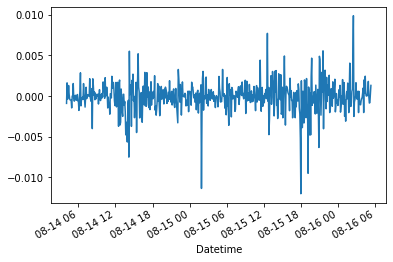

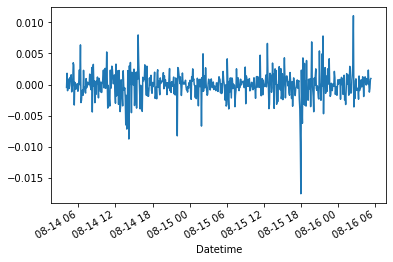

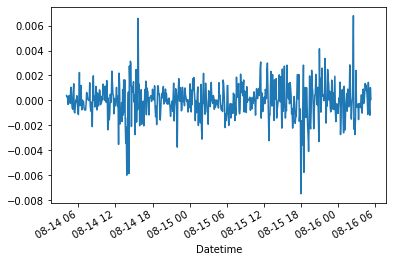

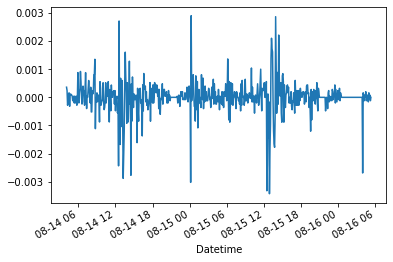

In [34]:
r['BTC-USD'].plot()
plt.show()
r['ETH-USD'].plot()
plt.show()
r['BNB-USD'].plot()
plt.show()
r['GC=F'].plot()
plt.show()

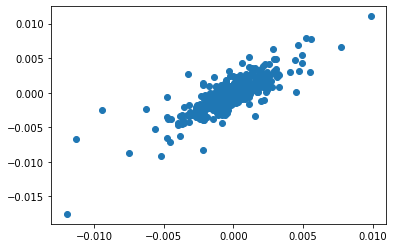

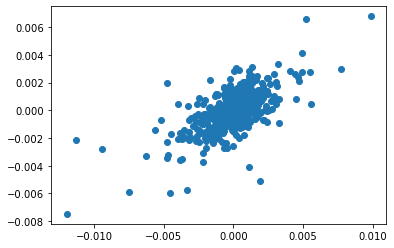

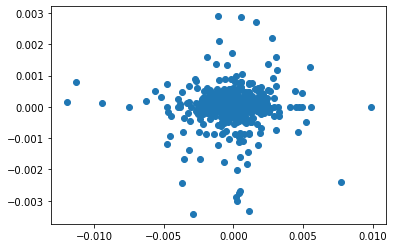

In [35]:
plt.scatter(r['BTC-USD'],r['ETH-USD'])
plt.show()
plt.scatter(r['BTC-USD'],r['BNB-USD'])
plt.show()
plt.scatter(r['BTC-USD'],r['GC=F'])
plt.show()


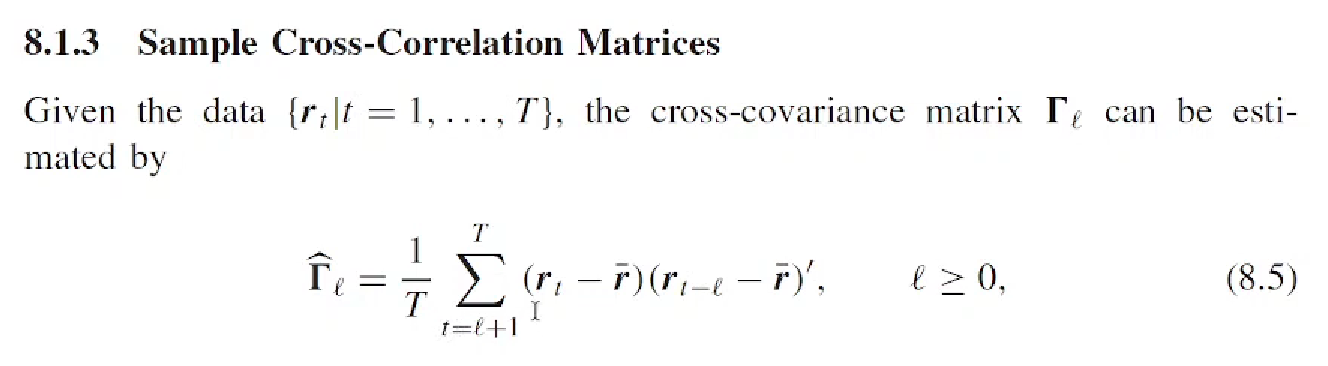

In [36]:
np.corrcoef(r.T)

array([[1.        , 0.65569281, 0.67153719, 0.02129898],
       [0.65569281, 1.        , 0.81808632, 0.02434517],
       [0.67153719, 0.81808632, 1.        , 0.02196398],
       [0.02129898, 0.02434517, 0.02196398, 1.        ]])

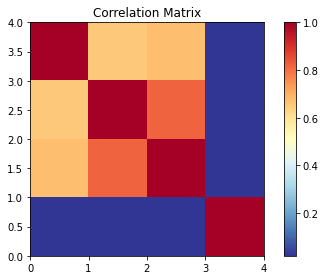

In [37]:
from statsmodels.graphics.correlation import plot_corr
#lag = 0
plot_corr(np.corrcoef(r.T))
plt.show()

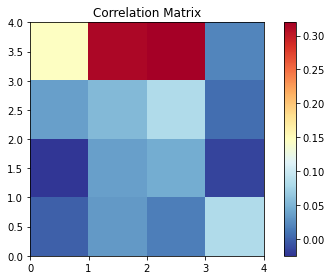

In [38]:
#lag = 1
plot_corr(np.corrcoef(r.iloc[1:,:].T, r.iloc[:-1,:].T)[:4,4:])
plt.show()

https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html

<StemContainer object of 3 artists>

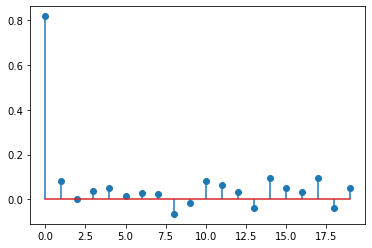

In [39]:
from statsmodels.tsa.stattools import ccf
ccf_out = ccf(r['BTC-USD'],r['ETH-USD'])
plt.stem(ccf_out[:20])

# VAR

https://www.statsmodels.org/dev/vector_ar.html

In [40]:
import yfinance as yf

# Download data for Bitcoin (BTC-USD), Ethereum (ETH-USD), Binance Coin (BNB-USD), and Gold (GC=F)
df = yf.download(['BTC-USD', 'ETH-USD', 'BNB-USD', 'GC=F'], start='2018-08-14')
price = df['Close']
r = np.log(price).diff().dropna()
price 

[*********************100%%**********************]  4 of 4 completed


Ticker,BNB-USD,BTC-USD,ETH-USD,GC=F
Date,,,,
2018-08-14,9.420110,6199.709961,278.932007,1193.000000
2018-08-15,9.463010,6308.520020,282.364014,1177.500000
2018-08-16,9.802330,6334.729980,288.045990,1176.199951
2018-08-17,10.867800,6580.629883,315.729004,1176.500000
2018-08-18,9.907580,6423.759766,295.812012,NaN
...,...,...,...,...
2024-08-12,518.536133,59354.515625,2724.431885,2462.399902
2024-08-13,524.128540,60609.566406,2703.671875,2466.699951
2024-08-14,524.015320,58737.269531,2662.914795,2439.399902


In [44]:
from statsmodels.tsa.api import VAR

model = VAR(r)
res = model.fit(2)
res.summary()

C:\Users\16462\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 16, Aug, 2024
Time:                     00:27:22
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -29.7853
Nobs:                     1181.00    HQIC:                  -29.8816
Log likelihood:           11012.5    FPE:                9.93675e-14
AIC:                     -29.9400    Det(Omega_mle):     9.63954e-14
--------------------------------------------------------------------
Results for equation BNB-USD
                coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------
const              0.002754         0.001506            1.828           0.067
L1.BNB-USD        -0.017413         0.043009           -0.405           0.686
L1.BTC-USD        -0.238513         0.077795           -3.066         

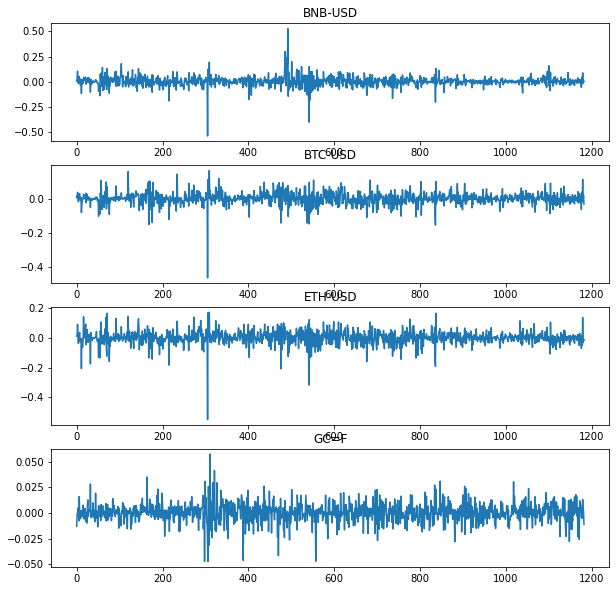

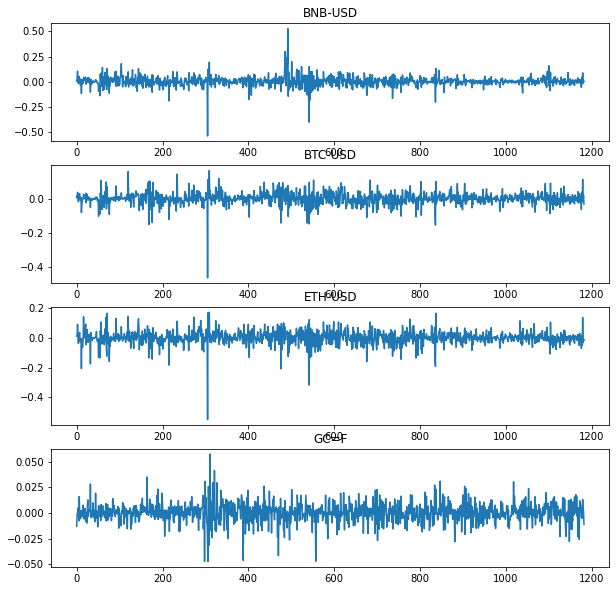

In [45]:
res.plot()

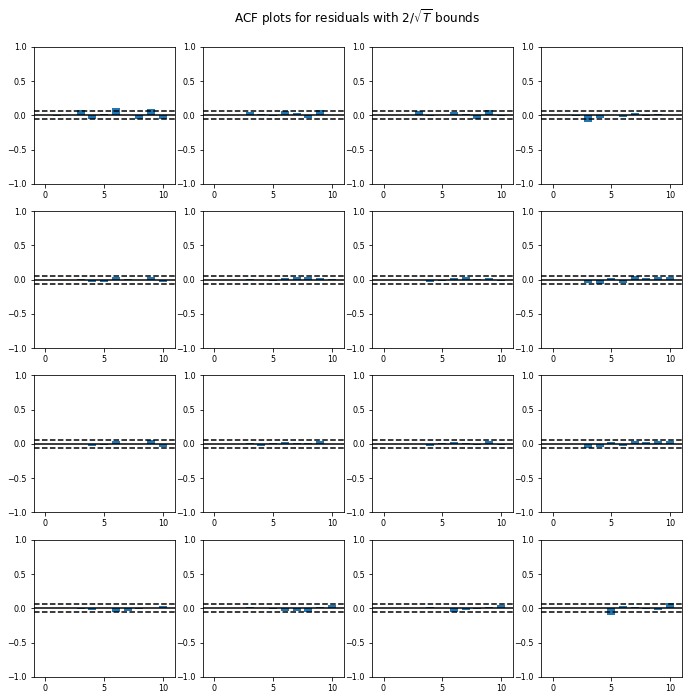

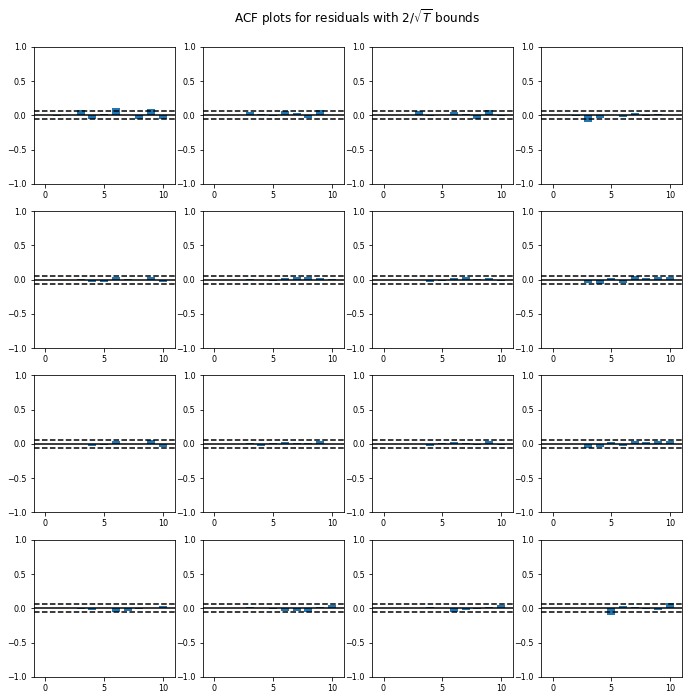

In [46]:
res.plot_acorr()